## Customers Segmentation based on their Credit Card usage bhaviour

Dataset for this notebook consists of credit card usage behavior of customers with 18 behavioral features. Segmentation of customers can be used to define marketing strategies.


**Content of this Kernel:**
* Data Preprocessing
* Clustering using KMeans
* Interpretation of Clusters
* Visualization of Clusters using PCA

In [44]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler 
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn import decomposition


In [2]:
data= pd.read_csv("CC GENERAL.csv")

In [3]:
data

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

CUST_ID это номер покупателя - уникальное значение и смысловой нагрузки для анализа не несет + там есть символ

In [7]:
data = data.drop('CUST_ID', axis=1)
data

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [8]:
data.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Заменим строки с NaN средним значением

In [9]:
data.loc[(data['MINIMUM_PAYMENTS'].isnull()==True),'MINIMUM_PAYMENTS']=data['MINIMUM_PAYMENTS'].mean()
data.loc[(data['CREDIT_LIMIT'].isnull()==True),'CREDIT_LIMIT']=data['CREDIT_LIMIT'].mean()

In [10]:
columns=['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT',
        'PAYMENTS', 'MINIMUM_PAYMENTS']

for c in columns:
    
    Range=c+'_RANGE'
    data[Range]=0        
    data.loc[((data[c]>0)&(data[c]<=500)),Range]=1
    data.loc[((data[c]>500)&(data[c]<=1000)),Range]=2
    data.loc[((data[c]>1000)&(data[c]<=3000)),Range]=3
    data.loc[((data[c]>3000)&(data[c]<=5000)),Range]=4
    data.loc[((data[c]>5000)&(data[c]<=10000)),Range]=5
    data.loc[((data[c]>10000)),Range]=6
 

In [11]:
columns=['BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 
         'CASH_ADVANCE_FREQUENCY', 'PRC_FULL_PAYMENT']

for c in columns:
    
    Range=c+'_RANGE'
    data[Range]=0
    data.loc[((data[c]>0)&(data[c]<=0.1)),Range]=1
    data.loc[((data[c]>0.1)&(data[c]<=0.2)),Range]=2
    data.loc[((data[c]>0.2)&(data[c]<=0.3)),Range]=3
    data.loc[((data[c]>0.3)&(data[c]<=0.4)),Range]=4
    data.loc[((data[c]>0.4)&(data[c]<=0.5)),Range]=5
    data.loc[((data[c]>0.5)&(data[c]<=0.6)),Range]=6
    data.loc[((data[c]>0.6)&(data[c]<=0.7)),Range]=7
    data.loc[((data[c]>0.7)&(data[c]<=0.8)),Range]=8
    data.loc[((data[c]>0.8)&(data[c]<=0.9)),Range]=9
    data.loc[((data[c]>0.9)&(data[c]<=1.0)),Range]=10
    

In [12]:
columns=['PURCHASES_TRX', 'CASH_ADVANCE_TRX']  

for c in columns:
    
    Range=c+'_RANGE'
    data[Range]=0
    data.loc[((data[c]>0)&(data[c]<=5)),Range]=1
    data.loc[((data[c]>5)&(data[c]<=10)),Range]=2
    data.loc[((data[c]>10)&(data[c]<=15)),Range]=3
    data.loc[((data[c]>15)&(data[c]<=20)),Range]=4
    data.loc[((data[c]>20)&(data[c]<=30)),Range]=5
    data.loc[((data[c]>30)&(data[c]<=50)),Range]=6
    data.loc[((data[c]>50)&(data[c]<=100)),Range]=7
    data.loc[((data[c]>100)),Range]=8

In [14]:
data.drop(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY',  'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT' ], axis=1, inplace=True)

X= np.asarray(data)

Normalizing input values.

In [15]:
scale = StandardScaler()
X = scale.fit_transform(X)
X.shape

(8950, 17)

K-means алгоритм

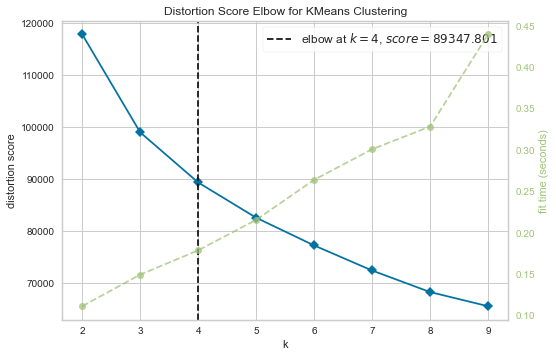

In [16]:
model = KMeans(random_state=1)

visualizer = KElbowVisualizer(model, k=(2,10))
visualizer.fit(X)

visualizer.show()
plt.show()

Метод локтя предлагает лучшим вариантом 3-4 кластера

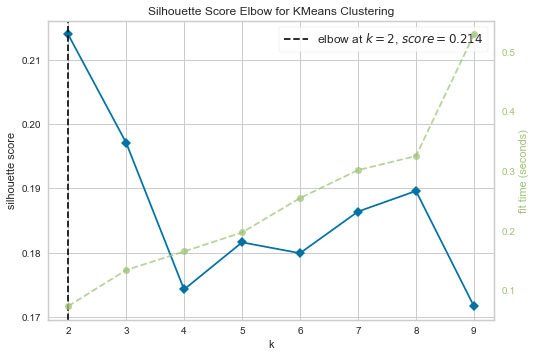

In [17]:
model = KMeans(random_state=1)

visualizer = KElbowVisualizer(model, k=(2,10), metric='silhouette')
visualizer.fit(X)

visualizer.show()
plt.show()

Метод силуэта предлагает лучшим вариантом 2 -3 кластера

In [35]:
KM_3_clusters = KMeans(n_clusters=3, init='k-means++').fit(X) 
labels = KM_3_clusters.labels_  

In [40]:
kmeans_df = pd.DataFrame(X,columns = data.columns)
kmeans_df['clusters'] = labels
kmeans_df

,TENURE,BALANCE_RANGE,PURCHASES_RANGE,ONEOFF_PURCHASES_RANGE,INSTALLMENTS_PURCHASES_RANGE,CASH_ADVANCE_RANGE,CREDIT_LIMIT_RANGE,PAYMENTS_RANGE,MINIMUM_PAYMENTS_RANGE,BALANCE_FREQUENCY_RANGE,PURCHASES_FREQUENCY_RANGE,ONEOFF_PURCHASES_FREQUENCY_RANGE,PURCHASES_INSTALLMENTS_FREQUENCY_RANGE,CASH_ADVANCE_FREQUENCY_RANGE,PRC_FULL_PAYMENT_RANGE,PURCHASES_TRX_RANGE,CASH_ADVANCE_TRX_RANGE,clusters
0,0.360680,-0.978511,-0.438623,-0.802193,0.052218,-0.786629,-1.513383,-1.038243,-0.678535,0.030404,-0.771610,-0.708951,-0.694434,-0.708130,-0.541199,-0.646812,-0.694622,0
1,0.360680,1.297983,-1.180155,-0.802193,-0.871405,2.382407,1.039345,1.293765,1.355251,0.472155,-1.264994,-0.708951,-0.939271,0.690317,0.452999,-1.099712,0.125978,2
2,0.360680,0.539152,0.302910,0.772805,-0.871405,-0.786629,1.039345,-0.260907,0.338358,0.472155,1.201929,2.515681,-0.939271,-0.708130,-0.541199,0.258988,-0.694622,1
3,0.360680,0.539152,1.044443,1.560304,-0.871405,-0.152822,1.039345,-1.815578,0.338358,-0.853097,-1.018302,-0.386487,-0.939271,-0.241981,-0.541199,-0.646812,0.125978,0
4,0.360680,-0.219680,-0.438623,-0.014694,-0.871405,-0.786629,-0.662473,-0.260907,-0.678535,0.472155,-1.018302,-0.386487,-0.939271,-0.708130,-0.541199,-0.646812,-0.694622,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,-4.122768,-0.978511,-0.438623,-0.802193,0.052218,-0.786629,-1.513383,-1.038243,-0.678535,0.472155,1.201929,-0.708951,1.264261,-0.708130,1.115797,-0.193912,-0.694622,0
8946,-4.122768,-0.978511,-0.438623,-0.802193,0.052218,-0.786629,-1.513383,-1.038243,0.338358,0.472155,1.201929,-0.708951,1.264261,-0.708130,-0.541199,-0.193912,-0.694622,0
8947,-4.122768,-0.978511,-0.438623,-0.802193,0.052218,-0.786629,-1.513383,-1.038243,-0.678535,0.030404,0.955237,-0.708951,0.774588,-0.708130,0.452999,-0.646812,-0.694622,0
8948,-4.122768,-0.978511,-1.180155,-0.802193,-0.871405,-0.152822,-2.364292,-1.038243,-0.678535,0.030404,-1.264994,-0.708951,-0.939271,0.224168,0.452999,-1.099712,0.125978,0


In [41]:
kmeans_df['clusters'].value_counts()

0    3728
2    2955
1    2267
Name: clusters, dtype: int64

DBSCAN

In [37]:
dbscan = DBSCAN(eps=2,min_samples=6)
dbscan.fit(X)
y_dbscan_pred = dbscan.labels_

In [39]:
dbscan_df = pd.DataFrame(X,columns = data.columns)
dbscan_df['clusters'] = y_dbscan_pred
dbscan_df

,TENURE,BALANCE_RANGE,PURCHASES_RANGE,ONEOFF_PURCHASES_RANGE,INSTALLMENTS_PURCHASES_RANGE,CASH_ADVANCE_RANGE,CREDIT_LIMIT_RANGE,PAYMENTS_RANGE,MINIMUM_PAYMENTS_RANGE,BALANCE_FREQUENCY_RANGE,PURCHASES_FREQUENCY_RANGE,ONEOFF_PURCHASES_FREQUENCY_RANGE,PURCHASES_INSTALLMENTS_FREQUENCY_RANGE,CASH_ADVANCE_FREQUENCY_RANGE,PRC_FULL_PAYMENT_RANGE,PURCHASES_TRX_RANGE,CASH_ADVANCE_TRX_RANGE,clusters
0,0.360680,-0.978511,-0.438623,-0.802193,0.052218,-0.786629,-1.513383,-1.038243,-0.678535,0.030404,-0.771610,-0.708951,-0.694434,-0.708130,-0.541199,-0.646812,-0.694622,0
1,0.360680,1.297983,-1.180155,-0.802193,-0.871405,2.382407,1.039345,1.293765,1.355251,0.472155,-1.264994,-0.708951,-0.939271,0.690317,0.452999,-1.099712,0.125978,0
2,0.360680,0.539152,0.302910,0.772805,-0.871405,-0.786629,1.039345,-0.260907,0.338358,0.472155,1.201929,2.515681,-0.939271,-0.708130,-0.541199,0.258988,-0.694622,0
3,0.360680,0.539152,1.044443,1.560304,-0.871405,-0.152822,1.039345,-1.815578,0.338358,-0.853097,-1.018302,-0.386487,-0.939271,-0.241981,-0.541199,-0.646812,0.125978,0
4,0.360680,-0.219680,-0.438623,-0.014694,-0.871405,-0.786629,-0.662473,-0.260907,-0.678535,0.472155,-1.018302,-0.386487,-0.939271,-0.708130,-0.541199,-0.646812,-0.694622,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,-4.122768,-0.978511,-0.438623,-0.802193,0.052218,-0.786629,-1.513383,-1.038243,-0.678535,0.472155,1.201929,-0.708951,1.264261,-0.708130,1.115797,-0.193912,-0.694622,0
8946,-4.122768,-0.978511,-0.438623,-0.802193,0.052218,-0.786629,-1.513383,-1.038243,0.338358,0.472155,1.201929,-0.708951,1.264261,-0.708130,-0.541199,-0.193912,-0.694622,0
8947,-4.122768,-0.978511,-0.438623,-0.802193,0.052218,-0.786629,-1.513383,-1.038243,-0.678535,0.030404,0.955237,-0.708951,0.774588,-0.708130,0.452999,-0.646812,-0.694622,0
8948,-4.122768,-0.978511,-1.180155,-0.802193,-0.871405,-0.152822,-2.364292,-1.038243,-0.678535,0.030404,-1.264994,-0.708951,-0.939271,0.224168,0.452999,-1.099712,0.125978,0


In [42]:
dbscan_df['clusters'].value_counts()

 0    8364
-1     573
 1      13
Name: clusters, dtype: int64

PCA

In [50]:
pca = decomposition.PCA(n_components=2)

X_centred = X - X.mean(axis=0)
pca.fit(X_centred)
X_pca = pca.transform(X_centred)
X_pca.shape

(8950, 2)

In [52]:
df_pca = pd.DataFrame(X_pca) 
df_pca.columns = ['n1', 'n2']

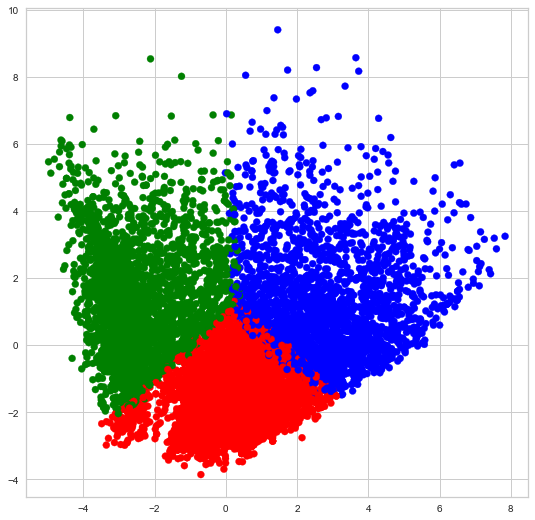

In [54]:
colours = {} 
colours[0] = 'red'
colours[1] = 'blue'
colours[2] = 'green'
cl = [colours[label] for label in labels] 
plt.figure(figsize =(9, 9))  
plt.scatter(df_pca['n1'], df_pca['n2'], c = cl) 
  
plt.show() 
